<a href="https://colab.research.google.com/github/dchatterjee/control.vehicle-control/blob/main/vehicle_speed_control_MPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gekko

     |████████████████████████████████| 12.4 MB 12.3 MB/s 


In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  

In [3]:
m = GEKKO(remote=False)
m.time = np.linspace(0,20,41)

In [4]:
# Parameters
mass = 500
b = m.Param(value=50)
K = m.Param(value=0.8)

In [5]:
#manupulatable variable
p = m.MV(value=0, lb=0, ub=100)
p.STATUS = 1  # allow optimizer to change
p.DCOST = 1 # smooth out gas pedal movement
p.DMAX = 20   # slow down change of gas pedal

In [6]:
# Controlled Variable
v = m.CV(value=0)
v.STATUS = 1  # add the SP to the objective
m.options.CV_TYPE = 2 # squared error
v.SP = 40     # set point
v.TR_INIT = 1 # set point trajectory
v.TAU = 5     # time constant of trajectory

In [7]:
# Process model
m.Equation(mass*v.dt() == -v*b + K*b*p)

m.options.IMODE = 6 # control
m.solve(disp=True)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            360
 Number of total equations: -          320
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             40
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.46755E+06  9.75000E+00
    1  5.13268E+07  9.50626E+00
    2  1.68386E+

In [8]:
# get additional solution information
import json
with open(m.path+'//results.json') as f:
    results = json.load(f)

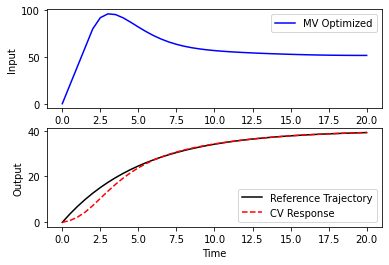

In [9]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,p.value,'b-',label='MV Optimized')
plt.legend()
plt.ylabel('Input')
plt.subplot(2,1,2)
plt.plot(m.time,results['v1.tr'],'k-',label='Reference Trajectory')
plt.plot(m.time,v.value,'r--',label='CV Response')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()